# MLB Drag analysis 

## Data Preprocessing

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


### Extract

In [ ]:
# Load the dataset
data = pd.read_csv('data/data_sample.csv')


### Transform

In [ ]:
# Convert categorical variables to category type
categorical_cols = ['pitcher_throws', 'bat_side', 'pitch_type', 'event_result']
for col in categorical_cols:
    data[col] = data[col].astype('category')

# Convert numeric columns to appropriate types
numeric_cols = ['release_speed', 'plate_speed', 'hit_exit_speed', 'hit_spinrate',
                'hit_vertical_angle', 'hit_bearing', 'hit_distance']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values
data['hit_spinrate'].fillna(data['hit_spinrate'].median(), inplace=True)

# Remove rows with missing critical data
data.dropna(subset=['hit_exit_speed', 'hit_distance'], inplace=True)

# Create derived features
data['speed_loss'] = data['release_speed'] - data['plate_speed']

### Load

In [40]:


cleaned_data = data
print(cleaned_data.head())

   year  month pitcher_throws bat_side pitch_type  release_speed  plate_speed  \
0  2016      7              R        R         FF      93.433688    85.791840   
1  2016      5              L        R         FT      89.341958    82.691620   
2  2016      4              R        L         FF      91.367354    84.554413   
4  2016      7              R        R         FF      91.033388    84.686417   
5  2016      8              R        R         FT      92.111897    84.612778   

   hit_exit_speed  hit_spinrate  hit_vertical_angle  hit_bearing  \
0      101.387283   1954.304443           25.563499   -22.539516   
1       94.986938   5588.018066           60.409538   -46.960789   
2       80.617020   2264.892334           30.243307    39.408298   
4      104.878571   1015.863892           12.043263     1.585894   
5      104.203636   2574.025635           -1.105875   -21.269363   

   hit_distance event_result  speed_loss  
0    392.216400     home_run    7.641848  
1    210.558151   

## Exploratory Data Analysis

In [29]:
# Basic data exploration
print(cleaned_data.info())
print(cleaned_data.describe())

# Check for any remaining missing values
print(cleaned_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 4522 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   year                4522 non-null   int64   
 1   month               4522 non-null   int64   
 2   pitcher_throws      4522 non-null   category
 3   bat_side            4522 non-null   category
 4   pitch_type          4522 non-null   category
 5   release_speed       4522 non-null   float64 
 6   plate_speed         4522 non-null   float64 
 7   hit_exit_speed      4522 non-null   float64 
 8   hit_spinrate        4522 non-null   float64 
 9   hit_vertical_angle  4522 non-null   float64 
 10  hit_bearing         4522 non-null   float64 
 11  hit_distance        4522 non-null   float64 
 12  event_result        4522 non-null   category
 13  speed_loss          4522 non-null   float64 
dtypes: category(4), float64(8), int64(2)
memory usage: 407.4 KB
None
              year        mo

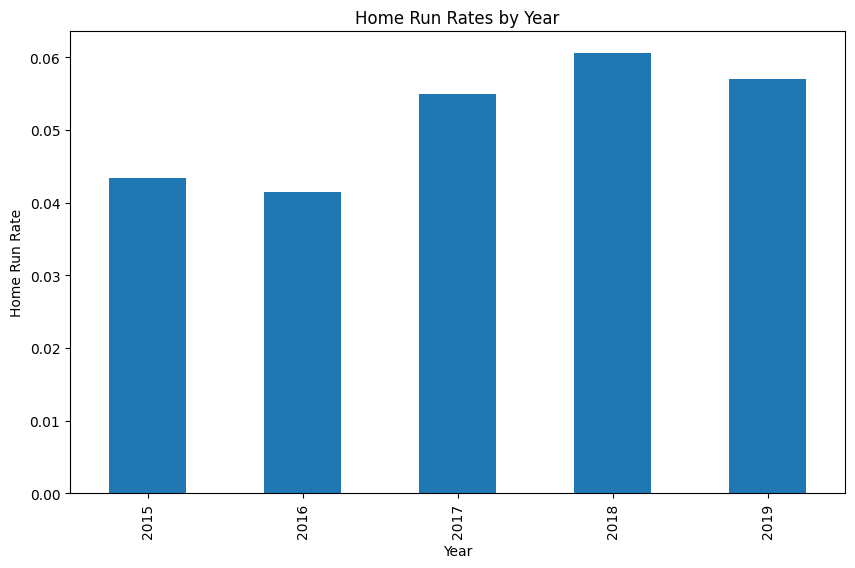

In [30]:
# Analyze homerun rates over time
hr_rates = cleaned_data.groupby('year')['event_result'].apply(lambda x: (x == 'home_run').mean())

plt.figure(figsize=(10, 6))
hr_rates.plot(kind='bar')
plt.title('Home Run Rates by Year')
plt.ylabel('Home Run Rate')
plt.xlabel('Year')
plt.show()

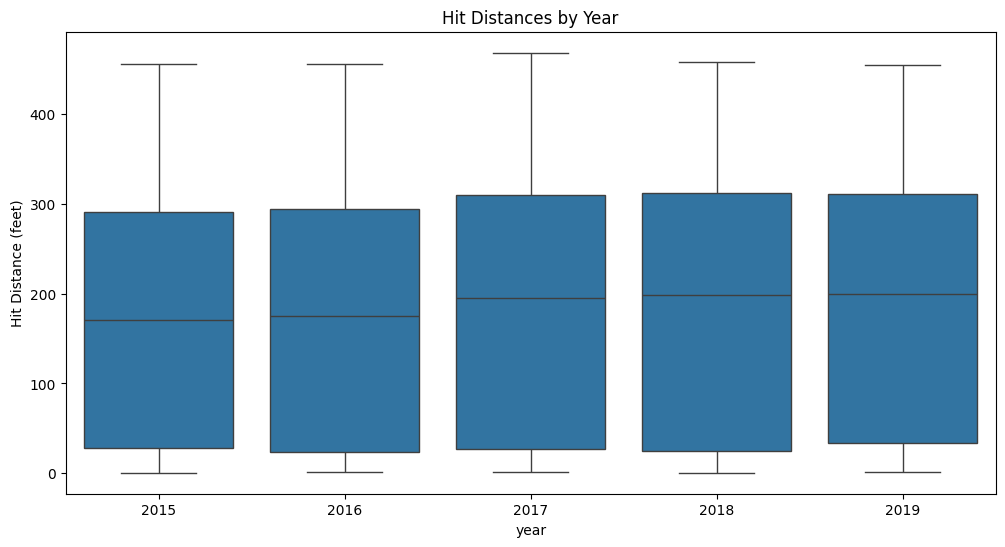

In [31]:
# Analyze hit distances over time
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='hit_distance', data=cleaned_data)
plt.title('Hit Distances by Year')
plt.ylabel('Hit Distance (feet)')
plt.show()

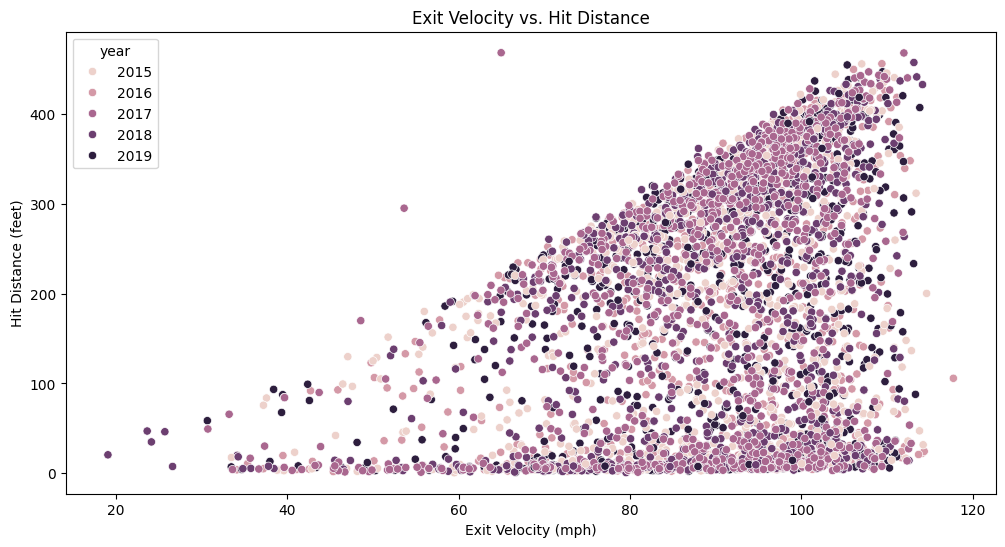

In [32]:
# Examine relationship between exit velocity and distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hit_exit_speed', y='hit_distance', hue='year', data=cleaned_data)
plt.title('Exit Velocity vs. Hit Distance')
plt.xlabel('Exit Velocity (mph)')
plt.ylabel('Hit Distance (feet)')
plt.show()

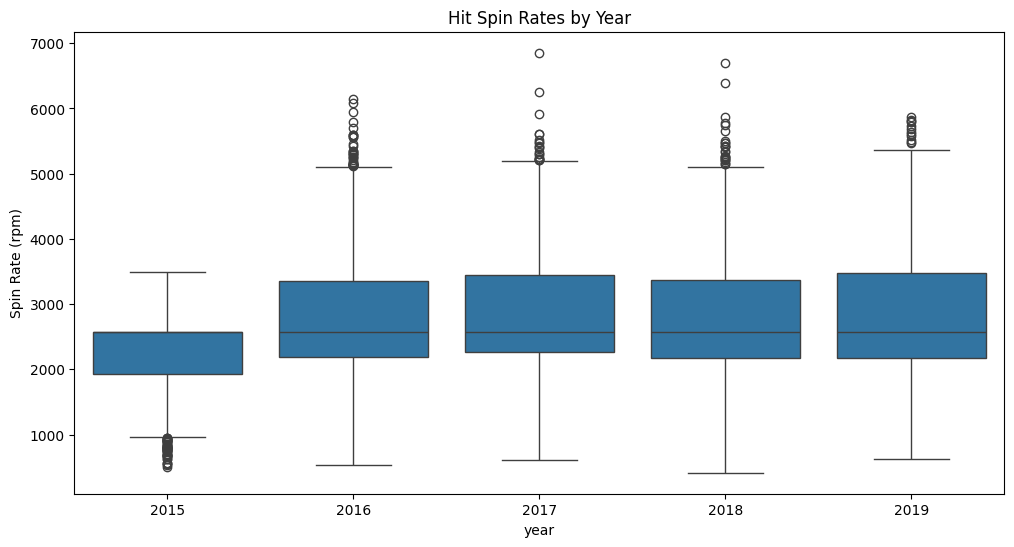

In [33]:
# Analyze spin rates over time
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='hit_spinrate', data=cleaned_data)
plt.title('Hit Spin Rates by Year')
plt.ylabel('Spin Rate (rpm)')
plt.show()

In [36]:
# Compare hit distances between first and last year
first_year = cleaned_data['year'].min()
last_year = cleaned_data['year'].max()

first_year_distances = cleaned_data[cleaned_data['year'] == first_year]['hit_distance']
last_year_distances = cleaned_data[cleaned_data['year'] == last_year]['hit_distance']

t_stat, p_value = stats.ttest_ind(first_year_distances, last_year_distances)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: -2.1109304421763544, p-value: 0.03491382907470867


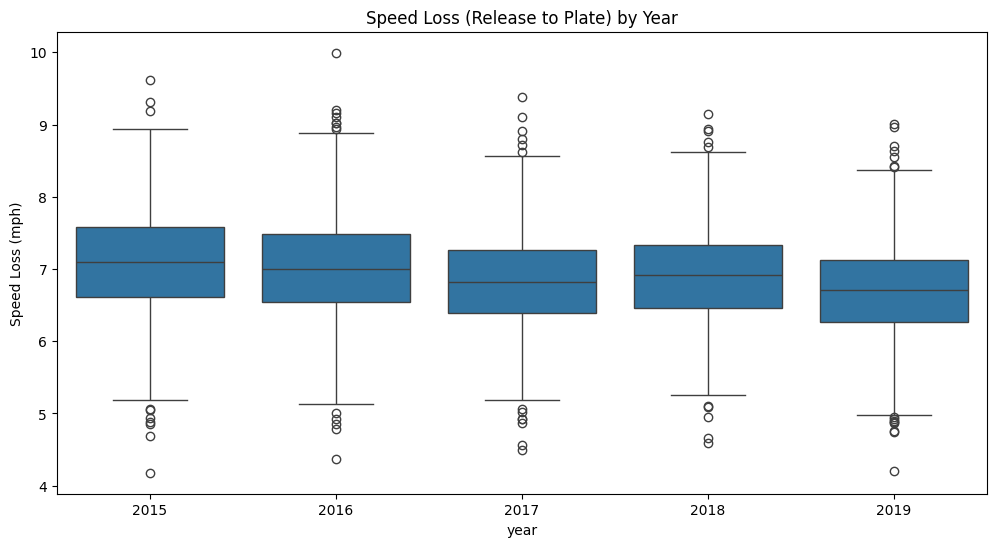

In [37]:
# Speed loss from release to plate
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='speed_loss', data=cleaned_data)
plt.title('Speed Loss (Release to Plate) by Year')
plt.ylabel('Speed Loss (mph)')
plt.show()

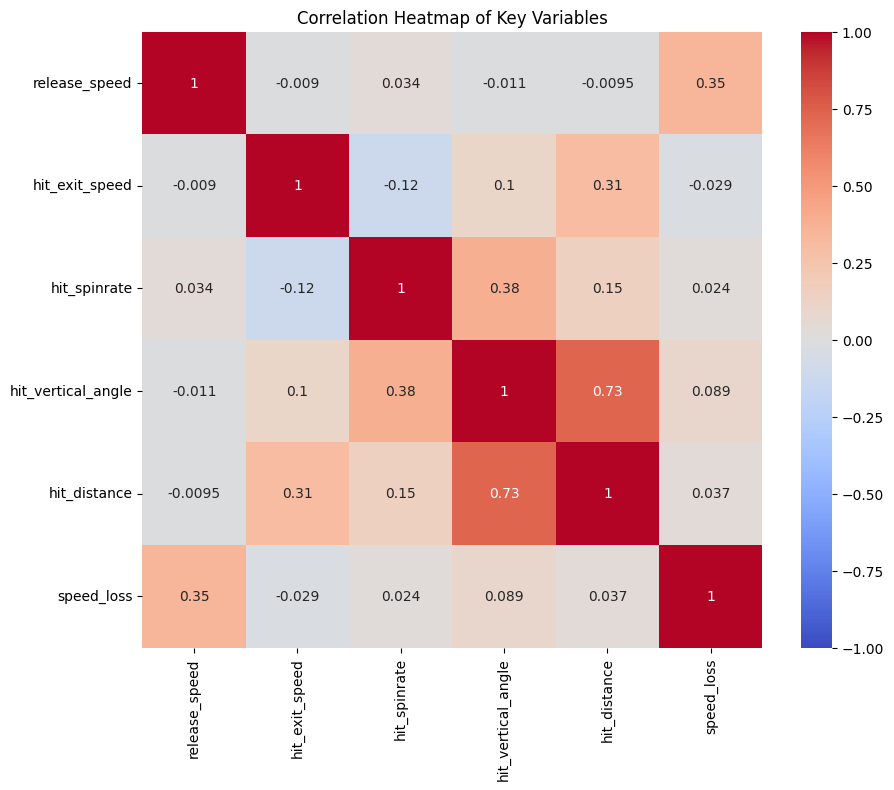

In [38]:
# Correlation heatmap
correlation_matrix = cleaned_data[['release_speed', 'hit_exit_speed', 'hit_spinrate',
                                   'hit_vertical_angle', 'hit_distance', 'speed_loss']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Key Variables')
plt.show()